In [6]:
def _siftup(heap, pos):
    endpos = len(heap)
    startpos = pos
    newitem = heap[pos]
    # Bubble up the smaller child until hitting a leaf.
    childpos = 2 * pos + 1  # leftmost child position
    while childpos < endpos:
        # Set childpos to index of smaller child.
        rightpos = childpos + 1
        if rightpos < endpos and not heap[childpos] < heap[rightpos]:
            childpos = rightpos
        # Move the smaller child up.
        heap[pos] = heap[childpos]
        pos = childpos
        childpos = 2 * pos + 1
    # The leaf at pos is empty now.  Put newitem there, and bubble it up
    # to its final resting place (by sifting its parents down).
    heap[pos] = newitem
    _siftdown(heap, startpos, pos)


def _siftdown(heap, startpos, pos):
    newitem = heap[pos]
    # Follow the path to the root, moving parents down until finding a place
    # newitem fits.
    while pos > startpos:
        parentpos = (pos - 1) >> 1
        parent = heap[parentpos]
        if newitem < parent:
            heap[pos] = parent
            pos = parentpos
            continue
        break
    heap[pos] = newitem

In [7]:
def heappush(heap, item):
    """Push item onto heap, maintaining the heap invariant."""
    heap.append(item)
    _siftdown(heap, 0, len(heap) - 1)


def heappop(heap):
    """Pop the smallest item off the heap, maintaining the heap invariant."""
    lastelt = heap.pop()  # raises appropriate IndexError if heap is empty
    if heap:
        returnitem = heap[0]
        heap[0] = lastelt
        _siftup(heap, 0)
        return returnitem
    return lastelt

In [ ]:
def heapify_(arr, N, i):

    largest = i  # Initialize largest as root
    l = 2 * i + 1  # left = 2*i + 1
    r = 2 * i + 2  # right = 2*i + 2

    # If left child is larger than root
    if l < N and arr[l] > arr[largest]:
        largest = l

    # If right child is larger than largest so far
    if r < N and arr[r] > arr[largest]:
        largest = r

    # If largest is not root
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]

        # Recursively heapify the affected sub-tree
        heapify_(arr, N, largest)

In [13]:
def heapify(x):
    """Transform list into a heap, in-place, in O(len(x)) time."""
    n = len(x)
    # Transform bottom-up.  The largest index there's any point to looking at
    # is the largest with a child index in-range, so must have 2*i + 1 < n,
    # or i < (n-1)/2.  If n is even = 2*j, this is (2*j-1)/2 = j-1/2 so
    # j-1 is the largest, which is n//2 - 1.  If n is odd = 2*j+1, this is
    # (2*j+1-1)/2 = j so j-1 is the largest, and that's again n//2-1.
    for i in reversed(range(n // 2)):
        _siftup(x, i)

In [8]:
h = []
heappush(h, 2)
heappush(h, 5)
heappush(h, 3)
h

[2, 5, 3]

In [1]:
def min_heapify(A, k):
    l = left(k)
    r = right(k)
    if l < len(A) and A[l] < A[k]:
        smallest = l
    else:
        smallest = k
    if r < len(A) and A[r] < A[smallest]:
        smallest = r
    if smallest != k:
        A[k], A[smallest] = A[smallest], A[k]
        min_heapify(A, smallest)


def left(k):
    return 2 * k + 1


def right(k):
    return 2 * k + 2


def build_min_heap(A):
    n = int((len(A) // 2) - 1)
    for k in range(n, -1, -1):
        min_heapify(A, k)


A = [3, 9, 2, 1, 4, 5]
build_min_heap(A)
print(A)

[1, 3, 2, 9, 4, 5]


**K maximum sum combinations from two arrays**

In [6]:
import heapq


# Function prints k maximum possible combinations
def KMaxCombinations(a, b, k):

    # Sorting the arrays.
    a.sort()
    b.sort()

    n = len(a)

    # Using a max-heap.
    pq = []
    heapq.heapify(pq)
    pq.append((-a[n - 1] - b[n - 1], (n - 1, n - 1)))

    # Using a set.
    my_set = set()
    my_set.add((n - 1, n - 1))

    for count in range(K):

        #  tuple format (sum, (i, j)).
        temp = heapq.heappop(pq)

        print(-temp[0])

        i = temp[1][0]
        j = temp[1][1]
        sum = a[i - 1] + b[j]

        temp1 = (i - 1, j)

        # insert (A[i - 1] + B[j], (i - 1, j))
        # into max heap.

        #  insert only if the pair (i - 1, j) is
        # not already present inside the map i.e.
        # no repeating pair should be present inside
        # the heap.
        if temp1 not in my_set:
            heapq.heappush(pq, (-sum, temp1))
            my_set.add(temp1)

        sum = a[i] + b[j - 1]

        temp1 = (i, j - 1)

        # insert (A[i1] + B[j = 1], (i, j - 1))
        # into max heap.

        # insert only if the pair (i, j - 1)
        # is not present inside the heap.
        if temp1 not in my_set:
            heapq.heappush(pq, (-sum, temp1))
            my_set.add(temp1)


# Driver Code.
A = [1, 4, 2, 3]
B = [2, 5, 1, 6]
K = 4

# Function call
KMaxCombinations(A, B, K)

10
9
9
8


**Maximum sum of at most two non-overlapping intervals in a list of Intervals**

In [2]:
from heapq import heappop, heappush


def maxTwoNonOverLapping(interval):
    ## Sorting the given array
    ## on the basis of startTime
    interval.sort()

    ## Initializing Priority Queue
    ## which stores endTime
    ## and value and sort
    ## on the basis of endTime
    pq = []

    ## Initializing max
    ## and ans variables
    ma = 0
    ans = 0

    ## Traversing the given array
    for e in interval:
        while pq:

            ## If endTime from priority
            ## queue is greater
            ## than startTime of
            ## traversing interval
            ## then break the loop
            if pq[0][0] >= e[0]:
                break
            qu = heappop(pq)

            ## Updating max variable
            ma = max(ma, qu[1])

        ## Updating ans variable
        ans = max(ans, ma + e[2])
        heappush(pq, ([e[1], e[2]]))

    ## Returning ans
    return ans


## Driver code
if __name__ == "__main__":

    interval = [[1, 3, 2], [4, 5, 2], [1, 5, 5]]

    maxValue = maxTwoNonOverLapping(interval)
    print(maxValue)

5


**Rearrange characters in a String such that no two adjacent characters are same**

In [4]:
from heapq import heappush, heappop
from collections import Counter


# A key class for readability
class Key:
    def __init__(self, character: str, freq: int) -> None:
        self.character = character
        self.freq = freq

    def __lt__(self, other: "Key") -> bool:
        # Comparing based on frequency
        return self.freq > other.freq


# Function to rearrange character of a string
# so that no char repeat twice
def rearrangestring(s: str):
    n = len(s)
    # Creating a frequency hashmap
    count = Counter(s)

    pq = []
    for c, freq in count.items():
        heappush(pq, Key(c, freq))

    # null character for default previous checking
    prev = Key("#", -1)
    result = []

    while pq:
        key = heappop(pq)
        result.append(key.character)

        # Since one character is already added
        key.freq -= 1

        # We avoid inserting if the frequency drops to 0
        if prev.freq > 0:
            heappush(pq, prev)

        prev = key

    if len(result) != n:
        return "-1"
    else:
        return "".join(result)


rearrangestring("geeksforgeeks")

'ekegseogsekfr'

**Find Median from Running Data Stream using**

Similar to above balancing BST Method, we can use a max heap on the left side to represent elements that are less

than effective median, and a min-heap on the right side to represent elements that are greater than effective median

In [3]:
# Python code to implement the approach

from heapq import heappush, heappop, heapify
import math


# Function to find the median of stream of data
def streamMed(arr, N):

    # Declaring two min heap
    g = []
    s = []
    for i in range(len(arr)):

        # Negation for treating it as max heap
        heappush(s, -arr[i])
        heappush(g, -heappop(s))
        if len(g) > len(s):
            heappush(s, -heappop(g))

        if len(g) != len(s):
            print(-s[0])
        else:
            print((g[0] - s[0]) / 2)


# Driver code
if __name__ == "__main__":
    A = [5, 15, 1, 3, 2, 8, 7, 9, 10, 6, 11, 4]
    N = len(A)

    # Function call
    streamMed(A, N)

5
10.0
5
4.0
3
4.0
5
6.0
7
6.5
7
6.5


In [5]:
import heapq


class Node:
    def __init__(self, data):
        self.data = data
        self.next = None


def mergeKList(arr, K):
    # Priority_queue 'queue' implemented
    # as min heap with the help of
    # 'compare' function
    queue = []
    for i in range(K):
        if arr[i] != None:
            heapq.heappush(queue, (arr[i].data, arr[i]))
    dummy = Node(0)
    last = dummy
    while queue:
        curr = heapq.heappop(queue)[1]
        last.next = curr
        last = last.next
        if curr.next != None:
            heapq.heappush(queue, (curr.next.data, curr.next))
    return dummy.next


def printList(node):
    while node != None:
        print(node.data, end=" ")
        node = node.next
    print()


if __name__ == "__main__":
    N = 3
    a = [None] * N
    # Linkedlist1
    head1 = Node(1)
    a[0] = head1
    head1.next = Node(3)
    head1.next.next = Node(5)
    head1.next.next.next = Node(7)
    # Limkedlist2
    head2 = Node(2)
    a[1] = head2
    head2.next = Node(4)
    head2.next.next = Node(6)
    head2.next.next.next = Node(8)
    # Linkedlist3
    head3 = Node(0)
    a[2] = head3
    head3.next = Node(9)
    head3.next.next = Node(10)
    head3.next.next.next = Node(11)
    res = mergeKList(a, N)
    if res != None:
        printList(res)

0 1 2 3 4 5 6 7 8 9 10 11 


In [7]:
# A Huffman Tree Node
import heapq


class node:
    def __init__(self, freq, symbol, left=None, right=None):
        # frequency of symbol
        self.freq = freq

        # symbol name (character)
        self.symbol = symbol

        # node left of current node
        self.left = left

        # node right of current node
        self.right = right

        # tree direction (0/1)
        self.huff = ""

    def __lt__(self, nxt):
        return self.freq < nxt.freq


# utility function to print huffman
# codes for all symbols in the newly
# created Huffman tree
def printNodes(node, val=""):

    # huffman code for current node
    newVal = val + str(node.huff)

    # if node is not an edge node
    # then traverse inside it
    if node.left:
        printNodes(node.left, newVal)
    if node.right:
        printNodes(node.right, newVal)

        # if node is edge node then
        # display its huffman code
    if not node.left and not node.right:
        print(f"{node.symbol} -> {newVal}")


# characters for huffman tree
chars = ["a", "b", "c", "d", "e", "f"]

# frequency of characters
freq = [5, 9, 12, 13, 16, 45]

# list containing unused nodes
nodes = []

# converting characters and frequencies
# into huffman tree nodes
for x in range(len(chars)):
    heapq.heappush(nodes, node(freq[x], chars[x]))

while len(nodes) > 1:

    # sort all the nodes in ascending order
    # based on their frequency
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)

    # assign directional value to these nodes
    left.huff = 0
    right.huff = 1

    # combine the 2 smallest nodes to create
    # new node as their parent
    newNode = node(left.freq + right.freq, left.symbol + right.symbol, left, right)

    heapq.heappush(nodes, newNode)

# Huffman Tree is ready!
printNodes(nodes[0])

f -> 0
c -> 100
d -> 101
a -> 1100
b -> 1101
e -> 111


**KMP**

O(n+m)

The basic idea behind KMP’s algorithm is: whenever we detect a mismatch (after some matches), we already know some of the characters in the 

text of the next window. We take advantage of this information to avoid matching the characters that we know will anyway match. 

For the pattern “AAAA”, lps[] is [0, 1, 2, 3]

For the pattern “ABCDE”, lps[] is [0, 0, 0, 0, 0]

For the pattern “AABAACAABAA”, lps[] is [0, 1, 0, 1, 2, 0, 1, 2, 3, 4, 5]

For the pattern “AAACAAAAAC”, lps[] is [0, 1, 2, 0, 1, 2, 3, 3, 3, 4] 

For the pattern “AAABAAA”, lps[] is [0, 1, 2, 0, 1, 2, 3]

In [1]:
def computeLPSArray(pat):
    M = len(pat)
    lps = [0] * M

    # Length of the previous longest prefix suffix
    length = 0
    i = 1

    # Loop calculates lps[i] for i = 1 to M-1
    while i < M:
        if pat[i] == pat[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1
    return lps


def KMPSearch(pat, txt):
    M = len(pat)
    N = len(txt)

    # Create lps[] that will hold the longest prefix
    # suffix values for pattern
    lps = computeLPSArray(pat)
    result = []

    i = 0  # index for txt
    j = 0  # index for pat
    while (N - i) >= (M - j):
        if pat[j] == txt[i]:
            j += 1
            i += 1

        if j == M:
            result.append(i - j + 1)
            j = lps[j - 1]
        elif i < N and pat[j] != txt[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return result


# Driver code
txt = "geeksforgeeks"
pat = "geeks"
result = KMPSearch(pat, txt)

# Print all the occurrences (1-based indices)
for index in result:
    print(index, end=" ")

1 9 

**next-permutation**

In [8]:
def nextPermutation(nums):
    index = None  # Step 1: Find the break point:
    for i in range(len(nums) - 2, -1, -1):
        if nums[i] < nums[i + 1]:
            index = i
            break

    # If break point does not exist:
    if index is None:
        nums[:] = nums[::-1]
    else:
        # Step 2: Find the next greater element
        #         and swap it with arr[ind]:
        print("break-point", index, nums[index])
        for i in range(len(nums) - 1, index, -1):
            if nums[i] > nums[index]:
                nums[index], nums[i] = nums[i], nums[index]
                break
        # Step 3: reverse the right half:
        print("before-reverse", index, nums)
        nums[index + 1 :] = nums[index + 1 :][::-1]
    return nums


print(nextPermutation([1, 2, 3]))
print(nextPermutation([1, 2, 3, 4]))
print(nextPermutation([3, 2, 1]))

break-point 1 2
before-reverse 1 [1, 3, 2]
[1, 3, 2]
break-point 2 3
before-reverse 2 [1, 2, 4, 3]
[1, 2, 4, 3]
[1, 2, 3]


In [ ]:
str = "4321"
str = "4321"

In [10]:
def prevPermutation(nums):
    index = None  # Step 1: Find the break point:
    for i in range(len(nums) - 2, -1, -1):
        if nums[i] > nums[i + 1]:
            index = i
            break

    # If break point does not exist:
    if index is None:
        nums[:] = nums[::-1]
    else:
        # Step 2: Find the next greater element
        #         and swap it with arr[ind]:
        print("break-point", index, nums[index])
        for i in range(len(nums) - 1, index, -1):
            if nums[i] < nums[index]:
                nums[index], nums[i] = nums[i], nums[index]
                break
        # Step 3: reverse the right half:
        print("before-reverse", index, nums)
        nums[index + 1 :] = nums[index + 1 :][::-1]
    return nums


prevPermutation([4, 3, 2, 1])
prevPermutation(nums=[4, 3, 1, 2])

break-point 2 2
before-reverse 2 [4, 3, 1, 2]
break-point 1 3
before-reverse 1 [4, 2, 1, 3]


[4, 2, 3, 1]

**Trie Or Prefix Tree**

Search or insert is O(n)

where n is length of string

In [32]:
# A class to store a Trie node
class Trie:
    # Constructor
    def __init__(self):
        self.isLeaf = False
        self.children = {}


def insert(root, word):
    current = root
    for char in word:
        if char not in current.children:
            current.children[char] = Trie()
        current = current.children[char]
    current.isLeaf = True
    return root


def search(root, word):
    current = root
    for char in word:
        if char not in current.children:
            return False
        current = current.children[char]

    return current.isLeaf


# not a good solution but work for now
# will leave some redundent keys in trie
def delete(root, data):
    current_node = root

    for ch in data:
        if ch in current_node.children.keys():
            current_node = current_node.children[ch]
        else:
            current_node = None
            break

    if current_node:
        current_node.is_end = False

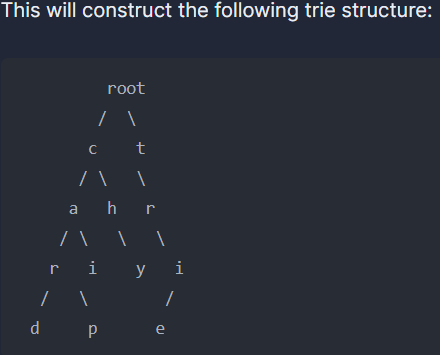

In [21]:
word_trie = Trie()


word_trie = insert(word_trie, "car")
word_trie = insert(word_trie, "card")
word_trie = insert(word_trie, "chip")
word_trie = insert(word_trie, "trie")
word_trie = insert(word_trie, "try")

In [22]:
print(search(word_trie, "car"))  # True
print(search(word_trie, "card"))  # True
print(search(word_trie, "ca"))  # False, just a prefix
print(search(word_trie, "cat"))  # False, word does not exist

True
True
False
False


**all word with given prefix**

In [29]:
def __child_words_for(node, words, curr):
    """
    Private helper function. Cycles through all children
    of node recursively, adding them to words if they
    constitute whole words (as opposed to merely prefixes).
    """
    if node.isLeaf:
        words.append(curr)
    for letter in node.children:
        __child_words_for(node.children[letter], words, curr + letter)


def starts_with(root, prefix):
    """
    Returns a list of all words beginning with the given prefix, or
    an empty list if no words begin with that prefix.
    """
    words = list()
    current = root
    for char in prefix:
        if char not in current.children:
            # Could also just return words since it's empty by default
            return list()
        current = current.children[char]

    # Step 2
    __child_words_for(current, words, prefix)
    return words

In [30]:
starts_with(word_trie, "tr")

['trie', 'try']

In [31]:
def findLCP(words):

    # insert all keys into a Trie
    head = Trie()
    for s in words:
        insert(head, s)

    # traverse the Trie and find the longest common prefix

    lcp = ""
    curr = head

    # loop until we find a leaf node or a node has more than 1 child
    while curr and not curr.isLeaf and len(curr.children) == 1:

        for k, v in curr.children.items():
            # append current char to LCP
            lcp += k

            # update `curr` pointer to the child node
            curr = v

    return lcp


if __name__ == "__main__":

    # given set of keys
    words = [
        "code",
        "coder",
        "coding",
        "codable",
        "codec",
        "codecs",
        "coded",
        "codeless",
        "codependence",
        "codependency",
        "codependent",
        "codependents",
        "codes",
        "codesign",
        "codesigned",
        "codeveloped",
        "codeveloper",
        "codex",
        "codify",
        "codiscovered",
        "codrive",
    ]

    print("longest common prefix is:", findLCP(words))

longest common prefix is: cod


**Find the shortest unique prefix for every word in an array**

In [35]:
# A class to store a Trie node
class TrieNode:
    def __init__(self):
        # each node stores a dictionary to its child nodes
        self.child = {}

        # keep track of the total number of times the current node is visited
        # while inserting data in Trie
        self.freq = 0


# Function to insert a given string into a Trie
def insert(root, word):

    # start from the root node
    curr = root
    for c in word:
        # create a new node if the path doesn't exist
        curr.child.setdefault(c, TrieNode())

        # increment frequency
        curr.child[c].freq += 1

        # go to the next node
        curr = curr.child[c]


# Function to recursively traverse the Trie in a preorder fashion and
# print the shortest unique prefix for each word in the Trie
def printShortestPrefix(root, word_so_far):
    if root is None:
        return

    # print `word_so_far` if the current Trie node is visited only once
    if root.freq == 1:
        print(word_so_far)
        return

    # recur for all child nodes
    for k, v in root.child.items():
        printShortestPrefix(v, word_so_far + k)


# Find the shortest unique prefix for every word in a given array
def findShortestPrefix(words):

    # construct a Trie from the given items
    root = TrieNode()
    for s in words:
        insert(root, s)

    # Recursively traverse the Trie in a preorder fashion to list all prefixes
    printShortestPrefix(root, "")


if __name__ == "__main__":

    words = ["AND", "BONFIRE", "BOOL", "CASE", "CATCH", "CHAR"]
    findShortestPrefix(words)

A
BON
BOO
CAS
CAT
CH


In [36]:
# A class to store a Trie node
class Trie:
    # Constructor
    def __init__(self):
        self.character = {}
        self.isLeaf = False  # true when the node is a leaf node


# Iterative function to insert a string into a Trie
def insert(root, s):
    # start from the root node
    curr = root

    for ch in s:
        # go to the next node (create if the path doesn't exist)
        curr = curr.character.setdefault(ch, Trie())

    curr.isLeaf = True


# Below lists detail all eight possible movements from a cell
# (top, right, bottom, left, and four diagonal moves)
row = [-1, -1, -1, 0, 1, 0, 1, 1]
col = [-1, 1, 0, -1, -1, 1, 0, 1]


# The function returns false if (x, y) is not valid matrix coordinates
# or cell (x, y) is already processed or doesn't lead to the solution
def isSafe(x, y, processed, board, ch):
    return (
        (0 <= x < len(processed))
        and (0 <= y < len(processed[0]))
        and not processed[x][y]
        and (board[x][y] == ch)
    )


# A recursive function to search valid words present in a boggle using trie
def searchBoggle(root, board, i, j, processed, path, result):
    # if a leaf node is encountered
    if root.isLeaf:
        # update result with the current word
        result.add(path)

    # mark the current cell as processed
    processed[i][j] = True

    # traverse all children of the current Trie node
    for key, value in root.character.items():

        # check for all eight possible movements from the current cell
        for k in range(len(row)):

            # skip if a cell is invalid, or it is already processed
            # or doesn't lead to any path in the Trie
            if isSafe(i + row[k], j + col[k], processed, board, key):
                searchBoggle(
                    value, board, i + row[k], j + col[k], processed, path + key, result
                )

    # backtrack: mark the current cell as unprocessed
    processed[i][j] = False


# Function to search for a given set of words in a boggle
def searchInBoggle(board, words):
    # construct a set for storing the result
    result = set()

    # base case
    if not board or not len(board):
        return

    # insert all words into a trie
    root = Trie()
    for word in words:
        insert(root, word)

    # `M × N` board
    (M, N) = (len(board), len(board[0]))

    # construct a matrix to store whether a cell is processed or not
    processed = [[False for x in range(N)] for y in range(M)]

    # consider each character in the matrix
    for i in range(M):
        for j in range(N):
            ch = board[i][j]  # current character

            # proceed only if the current character is a child of the Trie root node
            if ch in root.character:
                searchBoggle(root.character[ch], board, i, j, processed, ch, result)

    # return the result set
    return result


if __name__ == "__main__":
    board = [
        ["M", "S", "E", "F"],
        ["R", "A", "T", "D"],
        ["L", "O", "N", "E"],
        ["K", "A", "F", "B"],
    ]

    words = ["START", "NOTE", "SAND", "STONED"]
    searchInBoggle(board, words)

    validWords = searchInBoggle(board, words)
    print(validWords)

{'STONED', 'NOTE', 'SAND'}
